<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Inter:wght@500&display=swap" rel="stylesheet">


<h1 style="font-size: 30px; font-family: 'Inter', sans-serif;">Introducing to the Plant Disease Recognition Dataset</h1>
<p style="font-size: 17px; font-family: 'Inter', sans-serif;">This dataset contains three labels: <b>Healthy</b>, <b>Powdery</b>, <b>Rust</b> referring to plant conditions. There is a total of 1530 images divided into train, test, and validation sets.</p>

<h3 style="font-size: 25px; font-family: 'Inter', sans-serif;">Rusts</h3>
<p style="font-size: 17px; font-family: 'Inter', sans-serif;">
    
Rusts are plant diseases caused by pathogenic fungi of the order Pucciniales (previously known as Uredinales).

An estimated 168 rust genera and approximately 7,000 species, more than half of which belong to the genus Puccinia, are currently accepted.[1] Rust fungi are highly specialized plant pathogens with several unique features. Taken as a group, rust fungi are diverse and affect many kinds of plants. However, each species has a very narrow range of hosts and cannot be transmitted to non-host plants. In addition, most rust fungi cannot be grown easily in pure culture.

A single species of rust fungi may be able to infect two different plant hosts in different stages of its life cycle, and may produce up to five morphologically and cytologically distinct spore-producing structures viz., spermogonia, aecia, uredinia, telia, and basidia in successive stages of reproduction.[2] Each spore type is very host specific, and can typically infect only one kind of plant.

Rust fungi are obligate plant pathogens that only infect living plants. Infections begin when a spore lands on the plant surface, germinates, and invades its host. Infection is limited to plant parts such as leaves, petioles, tender shoots, stem, fruits, etc. Plants with severe rust infection may appear stunted, chlorotic (yellowed), or may display signs of infection such as rust fruiting bodies. Rust fungi grow intracellularly, and make spore-producing fruiting bodies within or, more often, on the surfaces of affected plant parts. Some rust species form perennial systemic infections that may cause plant deformities such as growth retardation, witch's broom, stem canker, galls, or hypertrophy of affected plant parts.

Rusts get their name because they are most commonly observed as deposits of powdery rust-coloured or brown spores on plant surfaces. The Roman agricultural festival Robigalia (April 25) has ancient origins in combating wheat rust.</p>

<img src="https://www.gardeningknowhow.com/wp-content/uploads/2020/11/plant-rust-disease.jpg" width="500px" height="300px">


<h3 style="font-size: 25px; font-family: 'Inter', sans-serif;">Powdery</h3>

<p style="font-size: 17px; font-family: 'Inter', sans-serif;">

Powdery mildew is a fungal disease that affects a wide range of plants. Powdery mildew diseases are caused by many different species of fungi in the order Erysiphales. Powdery mildew is one of the easier plant diseases to identify, as its symptoms are quite distinctive. Infected plants display white powdery spots on the leaves and stems. The lower leaves are the most affected, but the mildew can appear on any above-ground part of the plant. As the disease progresses, the spots get larger and denser as large numbers of asexual spores are formed, and the mildew may spread up and down the length of the plant.

Powdery mildew grows well in environments with high humidity and moderate temperatures. Greenhouses provide an ideal moist, temperate environment for the spread of the disease. This causes harm to agricultural and horticultural practices where powdery mildew may thrive in a greenhouse setting. In an agricultural or horticultural setting, the pathogen can be controlled using chemical methods, bio organic methods, and genetic resistance. It is important to be aware of powdery mildew and its management as the resulting disease can significantly reduce important crop yields.
</p>

<img src="https://media.istockphoto.com/photos/grapevine-diseases-downy-mildew-is-a-fungal-disease-that-affects-a-picture-id1161364148?k=6&m=1161364148&s=612x612&w=0&h=BzE8nsZHyGD3y7r1wvKIYDrvqLQcJdk_efFCUNB3134=" width="500px" height="300px">



In [1]:
# importing libraries 
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')



tf version 2.8.2
keras version 2.8.0
gpu is  not available


In [2]:
# Upload your kaggle.json file using this cell so that you can use the kaggle API
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ifeanyinneji","key":"68b7b1b6c0d102f7d9941d0b3eff800a"}'}

In [3]:
# This cell creates a .kaggle hidden folder in our root directory and copies the kaggle.json file to the folder.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [4]:
# This cell will download the dataset used for this project to the /content directory and also unzip the csv file.
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset
!unzip /content/plant-disease-recognition-dataset.zip

 99% 1.24G/1.25G [00:08<00:00, 171MB/s]
100% 1.25G/1.25G [00:09<00:00, 149MB/s]
Archive:  /content/plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  

In [6]:
img_width, img_height = 80,80
NAME = 'Model3_CNN_{}'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M"))
train_data_dir = '/content/Train/Train'
validation_data_dir = '/content/Test/Test/'
eval_data_dir = '/content/Validation/Validation/'


nb_train_samples = 400
nb_validation_samples = 100
nb_eval_samples = 60 
epochs = 50
batch_size = 16
num_of_class = 3

In [7]:
train_datagen = ImageDataGenerator( #Image Augmentation # Research on other parameters
                rescale = 1. / 255, 
                shear_range = 0.25, 
                zoom_range = 0.25,
                rotation_range=10) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) #Image Augmentation


  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size =(img_width, img_height), 
                                                    batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                    shuffle=False)
  
validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size =(img_width, img_height), 
                                                        batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                        shuffle=False) 

eval_generator = test_datagen.flow_from_directory(eval_data_dir, 
                                                  target_size =(img_width, img_height), 
                                                  batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                  shuffle=False)


Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


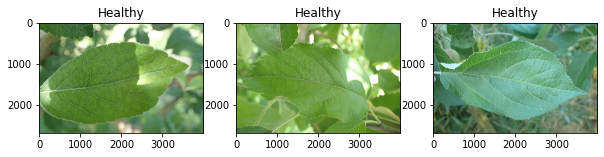

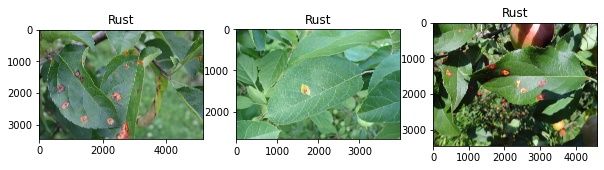

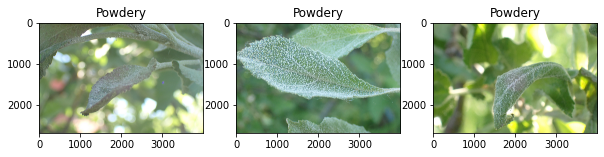

In [8]:
import random

def rescale_and_plot_images(image_files,class_name):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')
        plt.title(class_name)

def plot_images(path, class_name):
    image_paths = []
    class_name_path = os.path.join(path, class_name)
    image_paths = [os.path.join(class_name_path, img_png) for img_png in random.sample(os.listdir(class_name_path), 3)]
    
    plt.figure(figsize = (10, 25))
    rescale_and_plot_images(image_paths,class_name)
    

plot_images(train_data_dir, 'Healthy')
plot_images(train_data_dir, 'Rust')
plot_images(train_data_dir, 'Powdery')

In [9]:
input_shape = (img_width, img_height, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(num_of_class, activation='softmax'))

In [11]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 76, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0

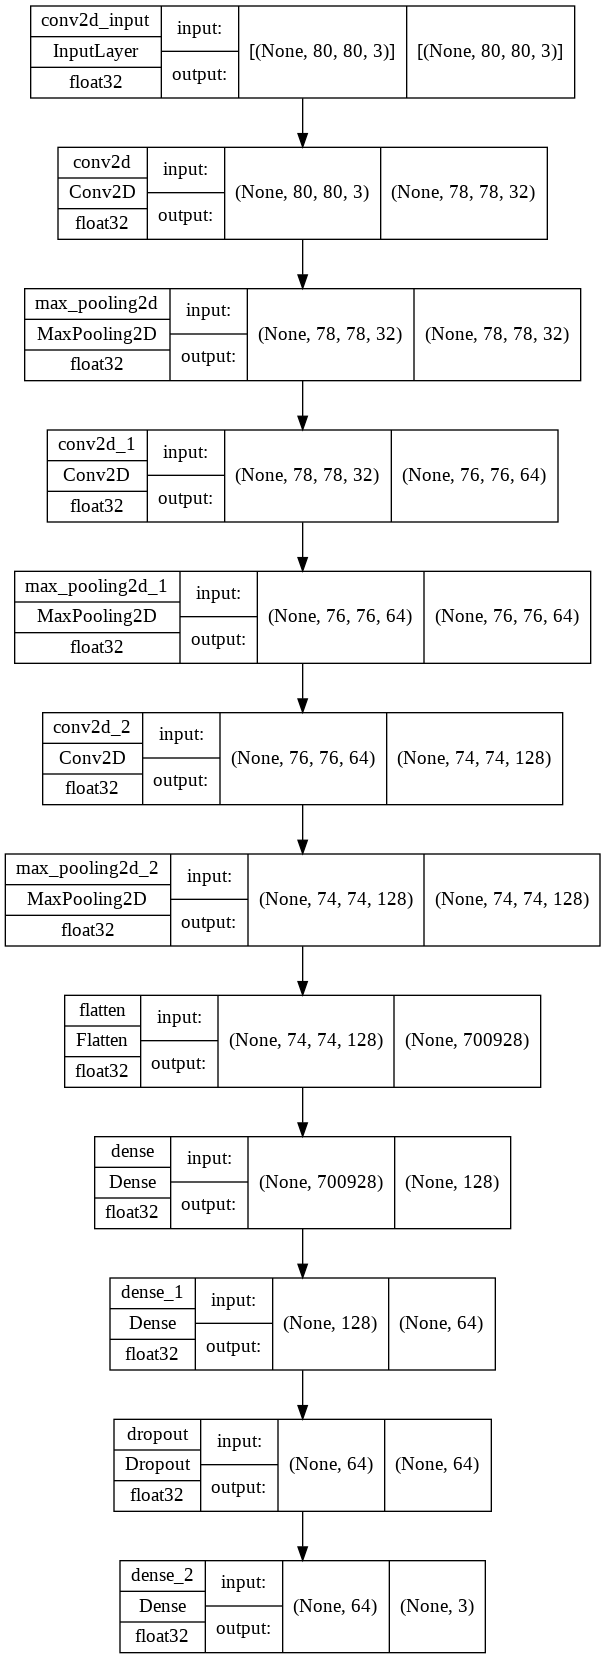

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [12]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [13]:
H = model3.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/50
25/25 [==============================] - 140s 6s/step - loss: 13.2108 - accuracy: 0.3000 - val_loss: 1.0731 - val_accuracy: 0.5208
Epoch 2/50
25/25 [==============================] - 130s 5s/step - loss: 1.3569 - accuracy: 0.2850 - val_loss: 0.9787 - val_accuracy: 0.5208
Epoch 3/50
25/25 [==============================] - 130s 5s/step - loss: 1.3477 - accuracy: 0.3883 - val_loss: 1.0851 - val_accuracy: 0.5208
Epoch 4/50
25/25 [==============================] - 129s 5s/step - loss: 1.4204 - accuracy: 0.2716 - val_loss: 1.1101 - val_accuracy: 0.5208
Epoch 5/50
25/25 [==============================] - 130s 5s/step - loss: 1.4189 - accuracy: 0.3375 - val_loss: 1.0944 - val_accuracy: 0.0625
Epoch 6/50
25/25 [==============================] - 130s 5s/step - loss: 1.1804 - accuracy: 0.3650 - val_loss: 1.1170 - val_accuracy: 0.3438
Epoch 7/50
25/25 [==============================] - 126s 5s/step - loss: 1.2877 - accuracy: 0.4900 - val_loss: 0.9752 - val_accuracy: 0.4896
Epoch 8/50
2

In [14]:
from keras.models import save_model
model3.save('plant_classifier.h5')

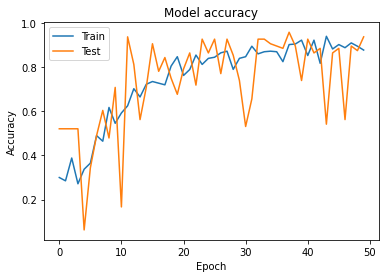

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

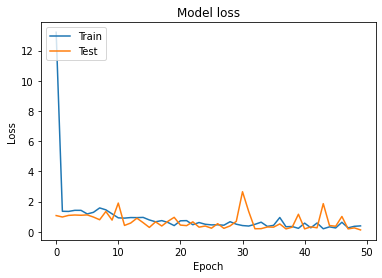

In [21]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('./'+'model1_train_test_los.jpeg',dpi=93)

In [24]:
validation_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=['Healthy','Powdery','Rust']

Y_pred = model3.predict_generator(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)

In [32]:
%%writefile requirements.txt
colabcode
fastapi[all]
pyngrok


Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

In [37]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar -xvzf /content/ngrok-v3-stable-linux-amd64.tgz
!ngrok authtoken 29vr8YhWZ9CDHrUq2kr0CpUA0e8_6ik4hU5GjJZeAYagTH5i4

--2022-07-26 13:12:51--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7189521 (6.9M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.tgz’

ngrok-v3-stable-lin 100%[===================>]   6.86M  5.31MB/s    in 1.3s    

2022-07-26 13:12:53 (5.31 MB/s) - ‘ngrok-v3-stable-linux-amd64.tgz’ saved [7189521/7189521]

ngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [34]:
from colabcode import ColabCode

In [56]:
# Library imports
import numpy as np
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import PlainTextResponse
import numpy as np
import io
from PIL import Image
import cv2
from keras.models import load_model
import warnings
warnings.filterwarnings("ignore")


# Loading the Model
model = load_model('plant_classifier.h5')

# Name of Classes
target_names = ['Healthy', 'Powdery', 'Rust']

app = FastAPI(
    title="Plant Disease Detection API",
    description="""An API that utilises a Deep Learning model built with Keras(Tensorflow) to detect if a plant is suffering from Corn-Common_rust, Potato-Early_blight or Tomato-Bacterial_spot.""",
    version="0.0.1",
    debug=True,
)


@app.get("/", response_class=PlainTextResponse)
async def running():
    note = """
Plant Disease Detection API 🙌🏻
Note: add "/docs" to the URL to get the Swagger UI Docs or "/redoc"
  """
    return note


favicon_path = "favicon.png"


@app.post("/predict")
async def root(file: UploadFile = File(...)):
    """
    The root function returns the prediction of an image using a pretrained model.
    Parameters:
        file (UploadFile): The image to be predicted. 
    Returns:
        result (str): The prediction of the image as a string.  
    Args:
        file:UploadFile=File(...): Specify that the file is uploaded as a multipart/form-data request
    Returns:
        The prediction of the model in json format
    """

    contents = io.BytesIO(await file.read())
    file_bytes = np.asarray(bytearray(contents.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, 1)
    img = cv2.resize(img, (80, 80))
    img.shape = (1, 80, 80, 3)
    image = model.predict(img)
    result = target_names[np.argmax(image)]
    return (str("Result from prediction: " +result + " plant."))


In [ ]:
cc = ColabCode(port=12000, code=False)
cc.run_app(app=app)